## Zadanie 1 - mierzenie czasu mnożenia 

In [1]:
df <- data.frame(matrix(ncol = 3, nrow = 0))
colnames(df) <- c('size', 'scalar', 'matrix')

In [2]:
for (a in seq(from=2,to=202,by=10)){
    for (i in 1:10){
        first <- runif(a,min = 0,max = 9)
        second <- runif(a,min = 0,max = 9)
        matr <- matrix(runif(a*a, min = 0, max = 9), nrow = a, ncol = a)
        start <- Sys.time()
        first*second
        end <- Sys.time()
        time1 <- end - start
        start <- Sys.time()
        matr * first
        end <- Sys.time()
        time2 = end - start   
        df[nrow(df)+1,] <- c(a,time1,time2)
    }
}

In [3]:
df_res <- aggregate(cbind(scalar,matrix) ~ size, data=df, FUN=mean)
df_res$sd1 <- aggregate(scalar ~ size, data=df, FUN=sd)$scalar
df_res$sd2 <- aggregate(matrix ~ size, data=df, FUN=sd)$matrix
df_res

size,scalar,matrix,sd1,sd2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,5.245209e-06,4.792213e-06,2.550571e-06,1.935127e-06
12,4.458427e-06,4.506111e-06,3.901462e-07,2.623808e-07
22,4.625320e-06,5.364418e-06,4.235240e-07,2.026168e-07
32,4.410744e-06,6.937981e-06,1.685874e-07,3.965688e-07
42,4.553795e-06,8.702278e-06,1.759207e-07,3.026236e-07
52,4.792213e-06,1.993179e-05,4.827608e-07,1.232737e-05
62,4.887581e-06,3.559589e-05,1.685874e-07,2.485481e-06
72,4.959106e-06,4.701614e-05,2.930814e-07,4.829963e-06
82,5.030632e-06,5.879402e-05,8.518808e-07,2.382066e-06


## Zadanie 2 - podstawowy wykres

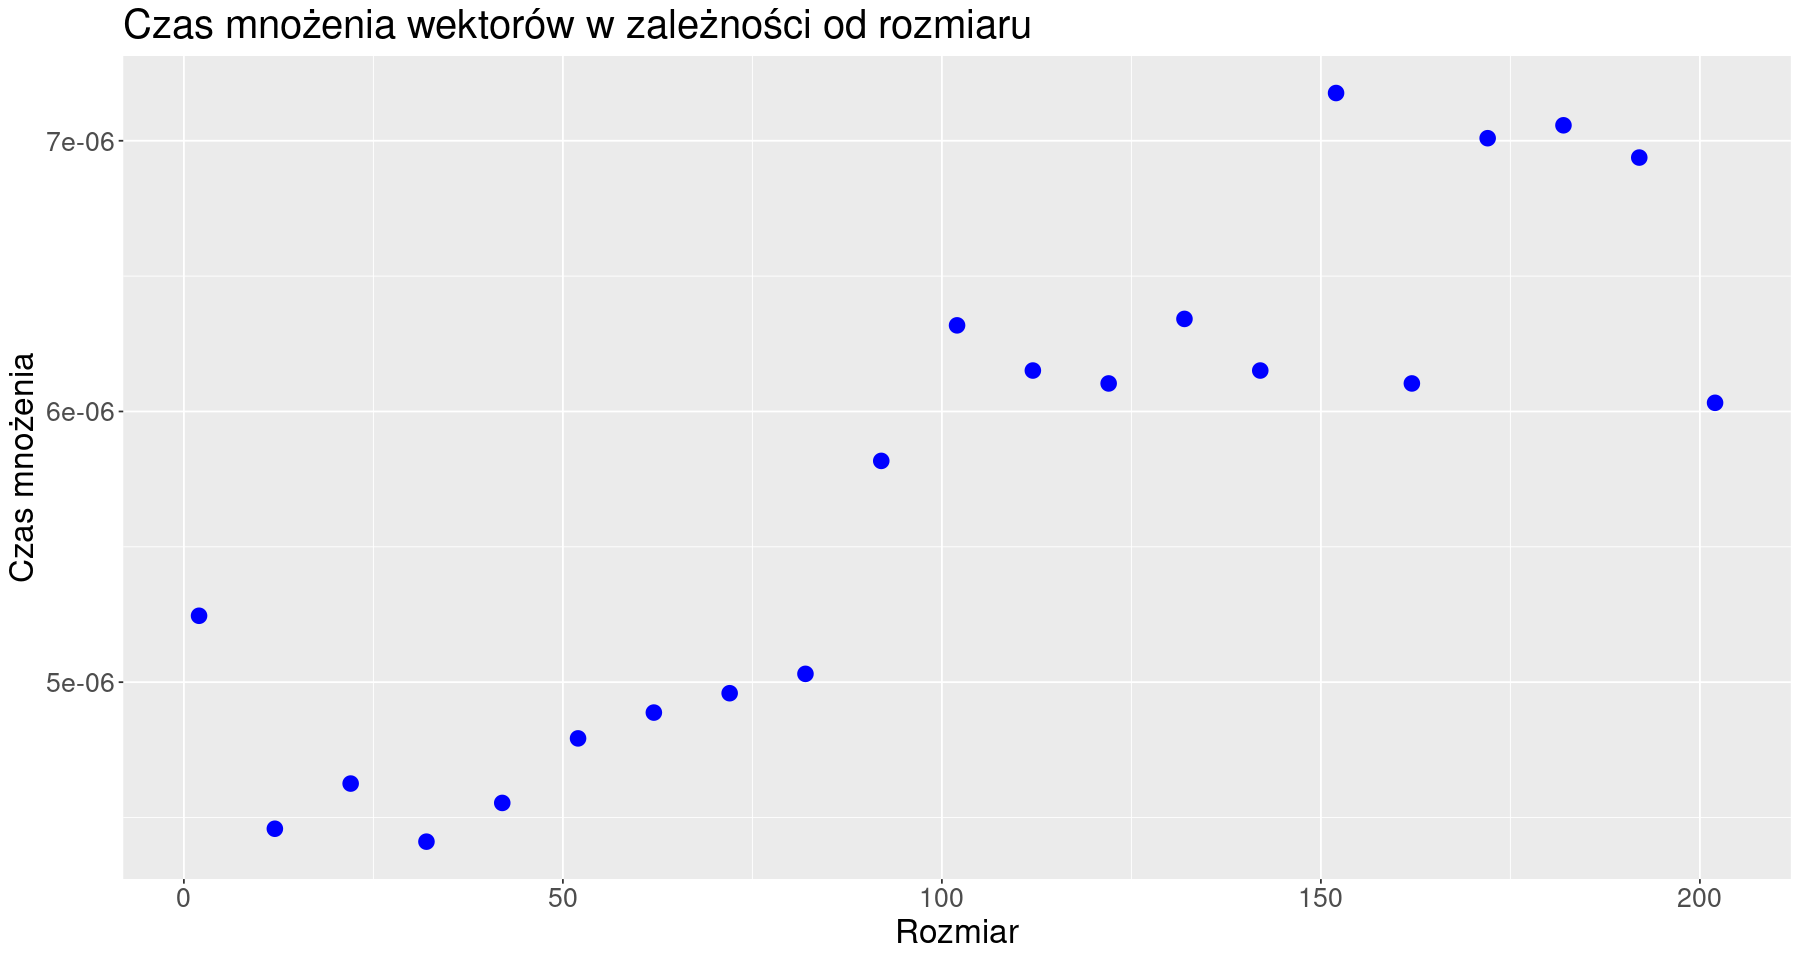

In [4]:
library(ggplot2)
options(repr.plot.width=15, repr.plot.height=8)
a <- ggplot(df_res, aes(x=size)) + 
geom_point(aes(y = scalar), size = 4, color="blue") + 
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia wektorów w zależności od rozmiaru") +
xlab("Rozmiar") +
ylab("Czas mnożenia")
a

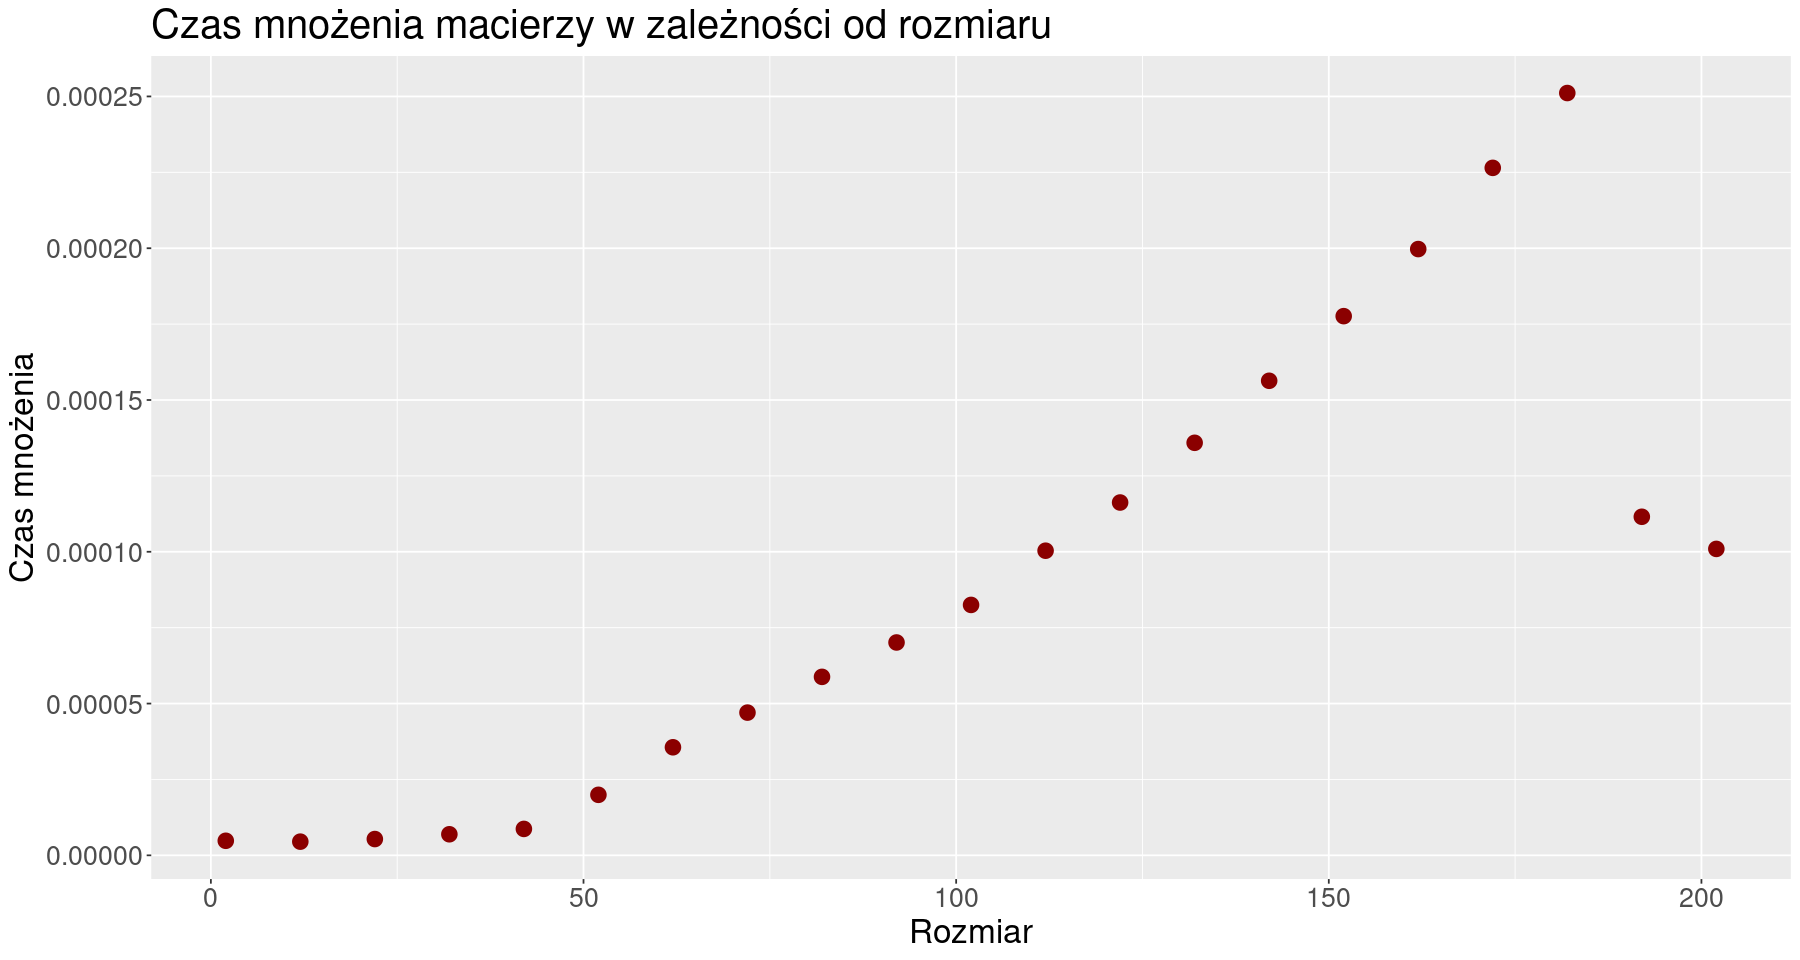

In [5]:
a <- ggplot(df_res, aes(x=size)) +  
geom_point(aes(y=matrix), size = 4,color="darkred") + 
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia macierzy w zależności od rozmiaru") +
xlab("Rozmiar") +
ylab("Czas mnożenia") 
a

## Zadanie 3 - naniesienie słupków błedów

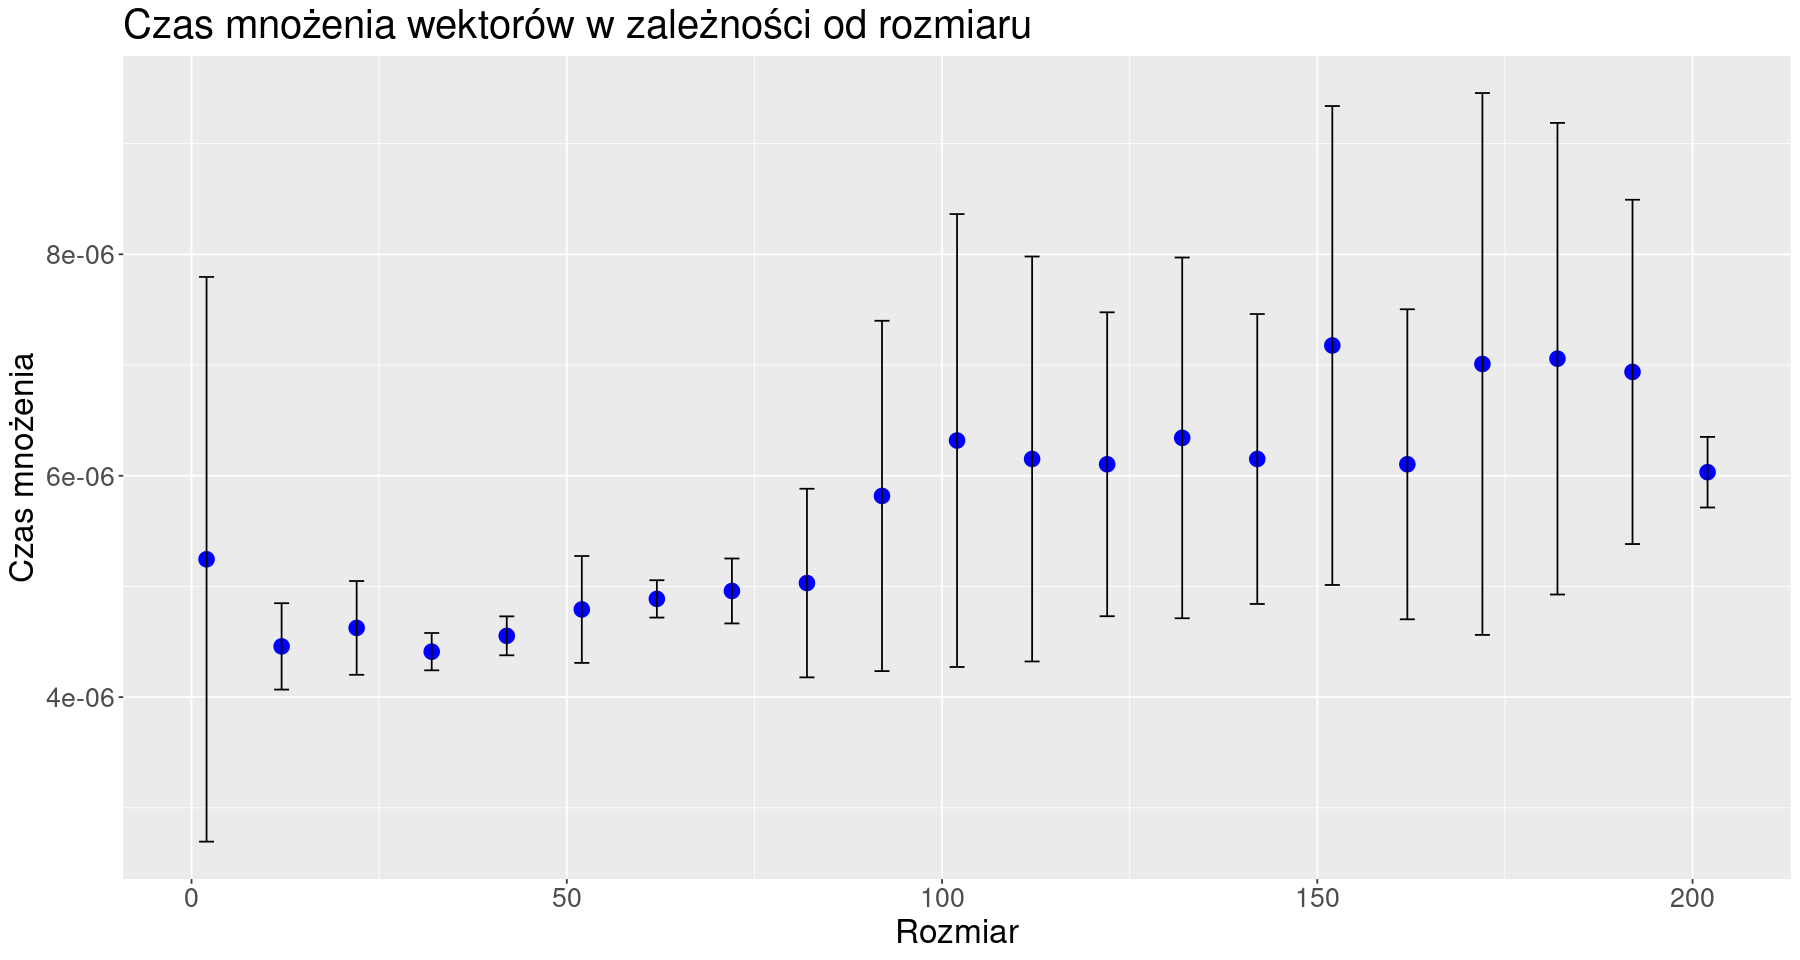

In [11]:
a <- ggplot(df_res, aes(x=size)) + 
geom_point(aes(y = scalar), size = 4,color="blue") + 
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia wektorów w zależności od rozmiaru") +
xlab("Rozmiar") +
ylab("Czas mnożenia") + 
geom_errorbar(aes(ymin = scalar-sd1, ymax = scalar+sd1, width=2)) 
a

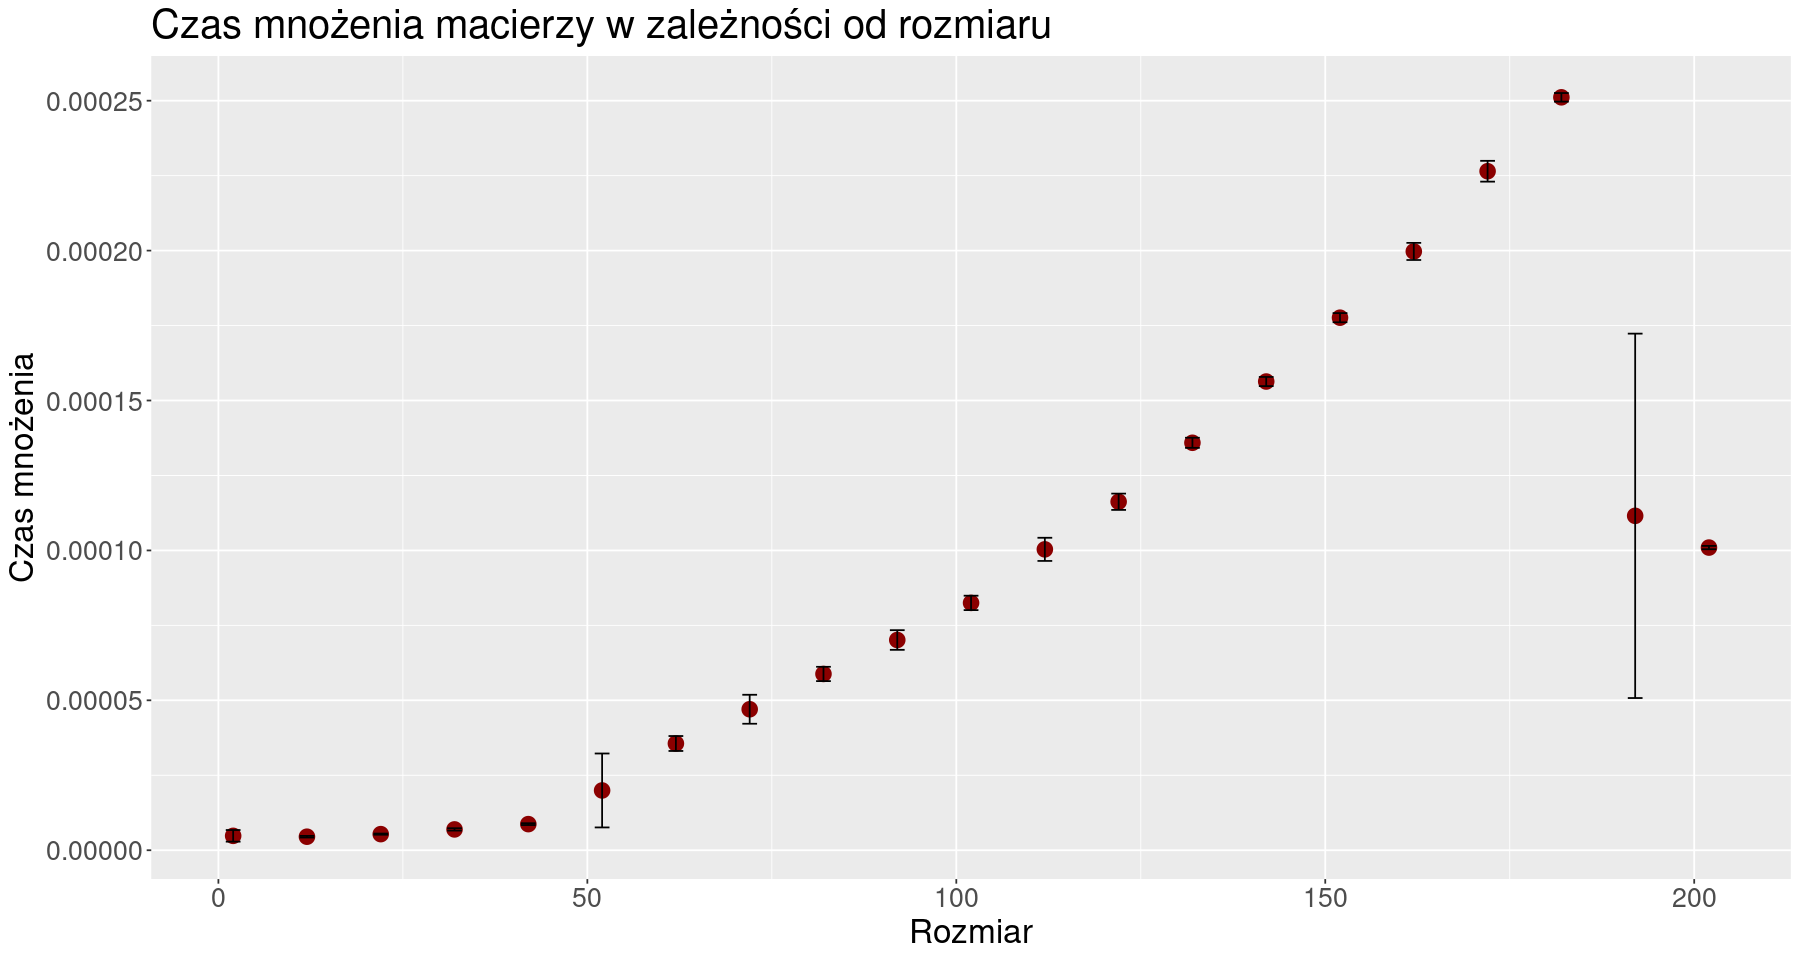

In [12]:
a <- ggplot(df_res, aes(x=size)) + 
geom_point(aes(y=matrix), size = 4, color="darkred") + 
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia macierzy w zależności od rozmiaru") +
xlab("Rozmiar") +
ylab("Czas mnożenia") + 
geom_errorbar(aes(ymin = matrix-sd2, ymax = matrix+sd2, width=2)) 
a

## Zadanie 4 - aproksymacja wielomianem

In [13]:
fit1 <- lm(scalar ~ poly(size, 5, raw=TRUE), data=df)
fit2 <- lm(matrix ~ poly(size, 5, raw=TRUE), data=df)
newdata = data.frame(size = seq(0, 210, length.out=420))
newdata$y1 = predict(fit1, newdata)
newdata$y2 = predict(fit2, newdata)

In [1]:
a <- ggplot(df_res, aes(x=size)) + 
geom_point(aes(y = scalar), size = 1, color="blue") + 
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia wektorów w zależności od rozmiaru") +
xlab("Rozmiar") +
ylab("Czas mnożenia") + 
geom_line(data=newdata, aes(size,y1))
a

ERROR: Error in ggplot(df_res, aes(x = size)): nie udało się znaleźć funkcji 'ggplot'


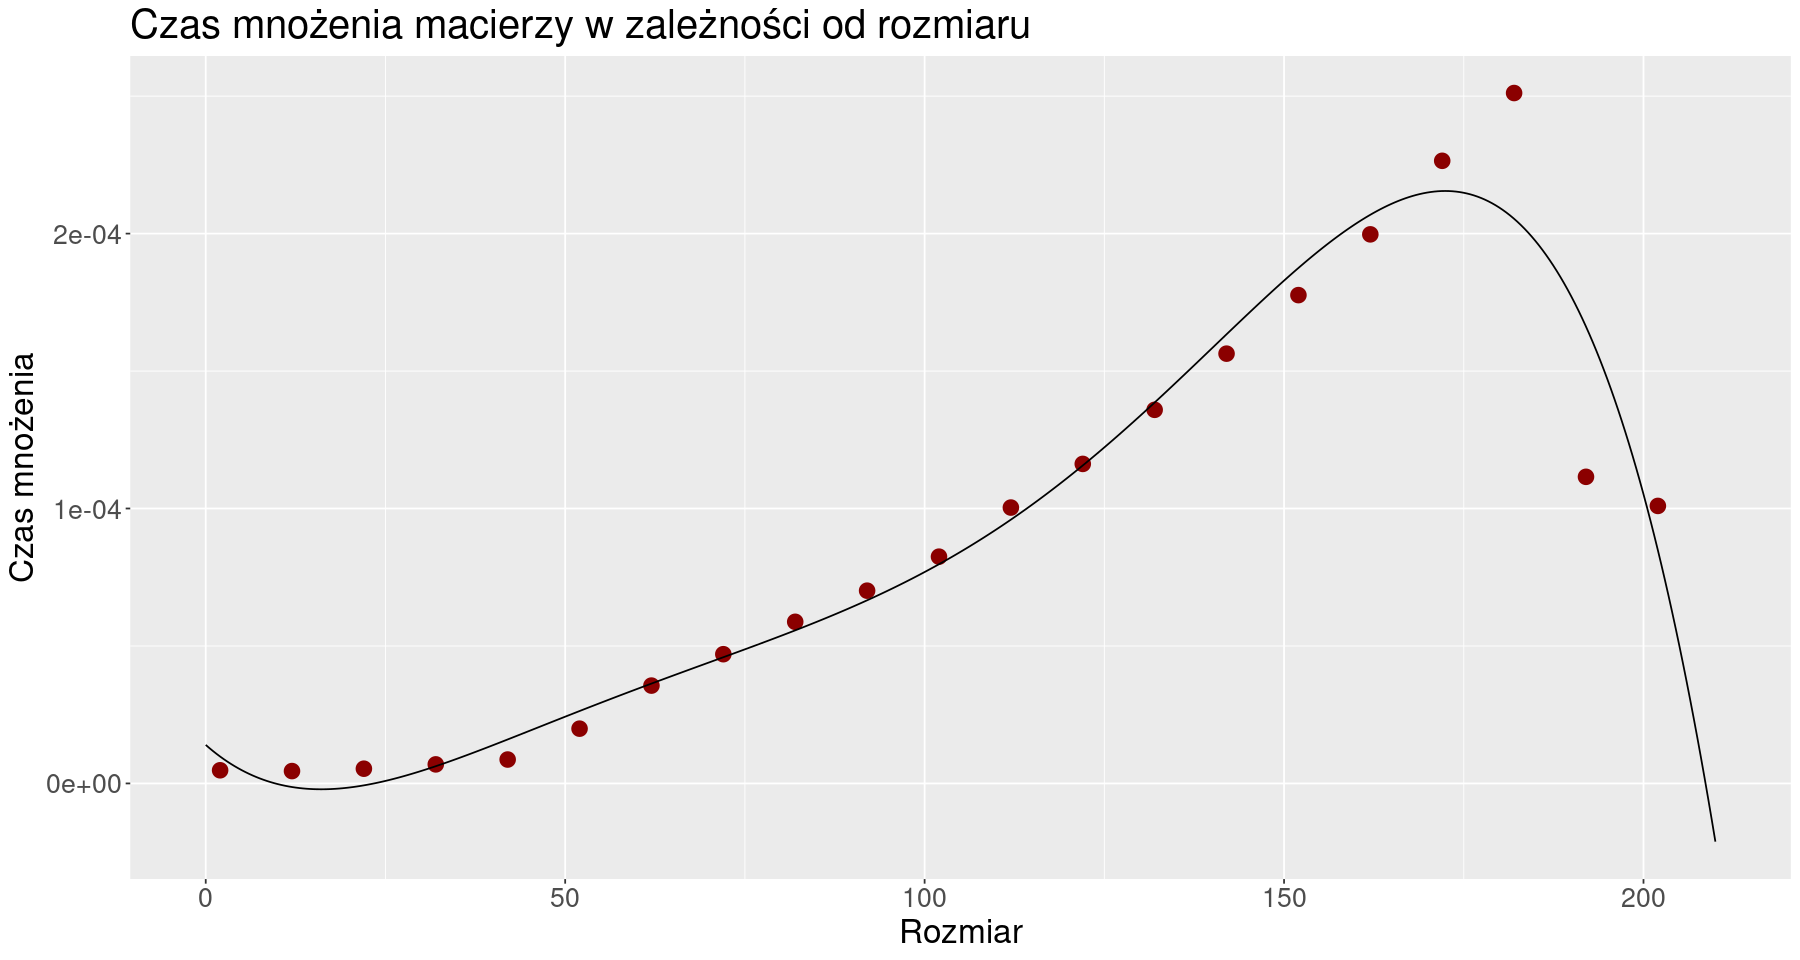

In [10]:
a <- ggplot(df_res, aes(x=size)) +  
geom_point(aes(y=matrix), size = 4,color="darkred") + 
theme(text = element_text(size = 20)) +
ggtitle("Czas mnożenia macierzy w zależności od rozmiaru") +
xlab("Rozmiar") +
ylab("Czas mnożenia") +
geom_line(data=newdata, aes(size,y2))
a